<a href="https://colab.research.google.com/github/Gianlucca123/Analyzing-the-violence-in-Rio-de-Janeiro/blob/main/Analisando_os_Crimes_do_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando a Violência do Rio de Janeiro


<center><img alt="Rio de Janeiro" width="40%" src="https://image.freepik.com/vetores-gratis/letras-de-cidade-do-rio-de-janeiro_23-2148380140.jpg"><figcaption> 
 <a href="https://br.freepik.com/vetores/projeto">Projeto vetor criado por freepik - br.freepik.com</a> 
</figcaption></center>

A violência no Brasil é um assunto recorrente nas mídias e não apresenta uma melhora com tempo. 

O estado do Rio de Janeiro, desde os anos de 1970, passa por um ciclo vicioso que combina queda na economia local, péssimos indicadores sociais, absurda desigualdade social e corrupção profunda em todos os nivéis da política do estado. 

Tudo isso acarreta em um enorme índice de violência no Rio de Janeiro, chegando a ficar internacionalmente famoso o caso da [Ocupação do Complexo do Alemão](https://noticias.uol.com.br/reportagens-especiais/alemao-10-anos-depois-da-ocupacao-ao-abandono/#page3).

Com o objetivo de tomar políticas públicas mais efetivas contra a violência, os Estados passaram a coletar dados sobre o assunto.

Por exemplo, o Rio de Janeiro trouxe a iniciativa do portal [ISPDados](http://www.ispdados.rj.gov.br/). Nesse projeto, vamos analisar os dados estatísticos da violência do Rio, explorando de forma simples algumas das variáveis disponíveis.



# Obtenção de Dados

Os dados foram obtidos do portal Instituto de Segurança Pública (ISP) cujo objetivo é produzir informações e disseminar pesquisas e análises para influenciar e subsidiar a implementação de políticas públicas de segurança.

De acordo com o portal, as estatísticas divulgadas por eles são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias da Secretaria de Estado de Polícia Civil do Rio de Janeiro (SEPOL), além de informações complementares de órgãos específicos da Secretaria de Estado de Polícia Militar do Rio de Janeiro (SEPM). Antes de serem consolidados no ISP, os RO são submetidos ao controle de qualidade realizado pela Corregedoria Geral de Polícia (CGPOL) da Secretaria de Estado de Polícia Civil. As estatísticas produzidas baseiam-se na data em que foi confeccionado o Registro de Ocorrência.

No caso do Dataset utlizado nesse projeto, o arquivo csv pode ser baixado diretamente [neste link](http://www.ispdados.rj.gov.br/Arquivos/DOMensalEstadoDesde1991.csv)

# Importando Dados

In [ ]:
#Importando as Bibliotecas necessárias
import pandas as pd  
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


dataset_path = "http://www.ispdados.rj.gov.br/Arquivos/DOMensalEstadoDesde1991.csv"  # Caminho para o Link do dataset

df = pd.read_csv(dataset_path , sep=";") # Lendo o arquivo csv para colocar no Dataframe

# Análise Inicial dos Dados

Primeiramente, vamos ver as informações básicas do Dataset, precisamos saber com o que estmaos lidando.

In [ ]:
# ver o tamanho do Dataset

print("Linhas/entradas: {}".format(df.shape[0]))  # Quantas linhas tem dataset
print("Colunas/variáveis: {}".format(df.shape[1])) # Quantas colunas tem o dataset

Linhas/entradas: 361
Colunas/variáveis: 56


Sabemos que o Dataset contém 344 linhas ou entradas e 56 colunas ou variáveis.
Vamos descobrir qual é o nome dessas variáveis.

In [ ]:
# Ver os nomes das variáveis

df.columns

Index(['ano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio', 'cvli',
       'hom_por_interv_policial', 'letalidade_violenta', 'tentat_hom',
       'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa',
       'roubo_transeunte', 'roubo_celular', 'roubo_em_coletivo', 'roubo_rua',
       'roubo_veiculo', 'roubo_carga', 'roubo_comercio', 'roubo_residencia',
       'roubo_banco', 'roubo_cx_eletronico', 'roubo_conducao_saque',
       'roubo_apos_saque', 'roubo_bicicleta', 'outros_roubos', 'total_roubos',
       'furto_veiculos', 'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_

Sabendo o tamanho do dataset e os nomes das variáveis. É importante saber os tipos de cada variável para podermos ver se necesssita ou não de ser modificada e qual caminho tomar na análise do dataset.

In [ ]:
# Ver os tipos das entradas 

df.dtypes

ano                            int64
mes                            int64
hom_doloso                     int64
lesao_corp_morte              object
latrocinio                     int64
cvli                          object
hom_por_interv_policial       object
letalidade_violenta            int64
tentat_hom                     int64
lesao_corp_dolosa              int64
estupro                       object
hom_culposo                   object
lesao_corp_culposa            object
roubo_transeunte               int64
roubo_celular                 object
roubo_em_coletivo              int64
roubo_rua                      int64
roubo_veiculo                  int64
roubo_carga                    int64
roubo_comercio                 int64
roubo_residencia               int64
roubo_banco                    int64
roubo_cx_eletronico           object
roubo_conducao_saque          object
roubo_apos_saque              object
roubo_bicicleta               object
outros_roubos                  int64
t

É interessante ver que há dois tipos: *int* e *object*

Não é interessante para nós que tenha essas variáveis do  tipo object pois não faz sentido, todas as variáveis contém informações numéricas.

Desse modo, temos que mudar o tipo object para *float*


In [ ]:
# Mudar o tipo das variáveis objetic para float64
df2 = df.apply(pd.to_numeric, errors='coerce')

df2.dtypes

ano                             int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
cvli                          float64
hom_por_interv_policial       float64
letalidade_violenta             int64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_transeunte                int64
roubo_celular                 float64
roubo_em_coletivo               int64
roubo_rua                       int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_comercio                  int64
roubo_residencia                int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubo

Pronto! Agora vamos ver algumas linhas do nosso dataset para ver como ele está organizado e como os dados são organizados.


In [ ]:
# Ver as 5 primeiras linhas do dataset

df2.head()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,NaN,672,162,3051,NaN,NaN,NaN,967,NaN,381,1348,1174,63,350,188,37,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,NaN,3
1,1991,2,732,NaN,17,NaN,NaN,749,175,3421,NaN,NaN,NaN,963,NaN,432,1395,1097,64,357,171,35,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,NaN,3
2,1991,3,713,NaN,25,NaN,NaN,738,216,3613,NaN,NaN,NaN,963,NaN,422,1385,1265,71,443,191,43,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,NaN,3
3,1991,4,634,NaN,20,NaN,NaN,654,200,3211,NaN,NaN,NaN,1186,NaN,354,1540,1415,81,425,199,36,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,NaN,3
4,1991,5,650,NaN,20,NaN,NaN,670,146,3051,NaN,NaN,NaN,931,NaN,335,1266,1449,82,553,231,27,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,3


Olhando apenas para as cinco primeiras linhas já conseguimos ver bastantes entradas sem informações completas (NaN). 

Isso pode acontecer por diversos motivos:
- Erro de digitação na hora de registrar o valor
- Com o tempo, o dataset pode ter perdido informações, seja na hora de mudar do papel para o digital seja pela má gestão de informações.
- Muito desses crimes não deviam ser contabilizados no passado ( existe dados que datam os anos de 1991) então por isso não há informação sobre ele durante a construção do dataset. 


Vamos ver a porcentagem de valores ausentes para cada variável: 

In [ ]:
((df2.isnull().sum() / df2.shape[0])*100).sort_values(ascending = False)

furto_bicicleta               76.454294
roubo_bicicleta               76.454294
posse_drogas                  49.861496
cmba                          49.861496
cmp                           49.861496
aaapai                        49.861496
apf                           49.861496
apreensao_drogas_sem_autor    49.861496
trafico_drogas                49.861496
roubo_cx_eletronico           39.889197
roubo_apos_saque              39.889197
extorsao                      39.889197
sequestro_relampago           39.889197
estelionato                   39.889197
roubo_conducao_saque          39.889197
furto_celular                 39.889197
furto_coletivo                39.889197
estupro                       39.889197
pol_militares_mortos_serv     39.889197
pol_civis_mortos_serv         39.889197
pessoas_desaparecidas         36.565097
encontro_ossada               36.565097
roubo_celular                 29.916898
lesao_corp_culposa            26.592798
registro_ocorrencias          26.592798


Como pode-se ver, há bastante variáveis com valores ausentes, alguns chegando a ter quase 80% de ausência (roubo_bicicleta e furto_bicicleta)!

Existem várias formas de se lidar com valores ausentes, podemos preencher eles com algum valor ou simplismente apagar. Como vamos fazer uma análise mais simples desse dataset e ele em si contém várias variáveis, trabalharemos apenas com as váriaveis que não apresentam esse problema.



# Informações Estatísticas da Violência no Rio de Janeiro

Antes de começar a analisar o nosso dataset em busca de insights, vamos usar o método *describe()* para ter uma visão geral do dataset, ele pode nos ajudar em diversos pontos como:
- Achar outliers
- Ver a distribuição dos dados.
- Identificar possíveis falhas na distribuição dos dados

In [ ]:
# ver informações estatísicas do dataframe

df2.describe()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
count,361.000000,361.000000,361.000000,265.000000,361.000000,265.000000,277.000000,361.000000,361.000000,361.000000,217.000000,277.000000,265.000000,361.000000,253.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,217.000000,217.000000,217.000000,85.000000,361.000000,361.000000,361.000000,361.000000,217.000000,217.000000,85.000000,361.000000,361.000000,265.000000,217.000000,217.000000,217.000000,361.000000,181.000000,181.000000,181.000000,361.000000,181.000000,181.000000,181.000000,181.000000,265.000000,229.000000,361.000000,229.000000,217.000000,217.000000,265.000000,361.000000
mean,2005.542936,6.484765,495.155125,4.256604,15.299169,468.611321,74.537906,570.772853,320.975069,5445.767313,373.557604,209.090253,3299.218868,3459.498615,996.300395,668.052632,4825.789474,2442.792244,345.149584,447.534626,130.160665,8.980609,3.640553,10.940092,140.073733,12.258824,1222.022161,9518.279778,1648.055402,1496.127424,631.179724,1422.156682,133.400000,6000.911357,10410.781163,0.637736,131.571429,7.820276,2368.225806,1103.972299,622.939227,770.994475,182.259669,1757.268698,2351.038674,553.392265,1243.707182,85.872928,5435.800000,426.096070,64.249307,3.279476,2.023041,0.336406,53678.120755,2.988920
std,8.693801,3.464168,119.159712,2.722348,6.002243,96.548562,38.504322,108.445293,125.629159,1507.367035,93.693638,54.071435,874.356017,2421.600373,629.567801,298.381923,3180.237643,780.396081,220.487099,122.667185,45.632490,10.470974,2.647468,6.362586,56.817969,8.361125,784.665477,4526.373066,312.759017,962.222491,270.835949,395.903401,78.179159,1934.949107,3652.312145,0.943925,42.304952,4.988872,904.199651,645.519751,242.854647,300.436913,37.054674,649.249988,630.864128,241.526593,363.586040,68.807141,1147.600798,73.661384,34.873643,2.247917,1.735902,0.632611,10951.713788,0.104824
min,1991.000000,1.000000,239.000000,0.000000,2.000000,249.000000,10.000000,297.000000,122.000000,2350.000000,188.000000,111.000000,584.000000,688.000000,0.000000,281.000000,1086.000000,1097.000000,59.000000,169.000000,38.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,904.000000,255.000000,23.000000,305.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,106.000000,729.000000,1173.000000,225.000000,544.000000,2.000000,1409.000000,178.000000,0.000000,0.000000,0.000000,0.000000,30621.000000,2.000000
25%,1998.000000,3.000000,397.000000,2.000000,11.000000,391.000000,43.000000,492.000000,202.000000,4069.000000,289.000000,173.000000,2940.000000,1069.000000,560.000000,437.000000,1610.000000,1885.000000,212.000000,357.000000,98.000000,2.000000,2.000000,6.000000,93.000000,5.000000,822.000000,5327.000000,1413.000000,726.000000,440.000000,1250.000000,103.000000,4021.000000,6717.000000,0.000000,107.000000,5.000000,1716.000000,733.000000,387.000000,476.000000,154.000000,1263.000000,1733.000000,341.000000,943.000000,44.000000,4789.000000,384.000000,39.000000,2.000000,1.000000,0.000000,45417.000000,3.000000
50%,2006.000000,6.000000,500.000000,4.000000,15.000000,476.000000,71.000000,583.000000,324.000000,5705.000000,390.000000,199.000000,3322.000000,3253.000000,759.000000,598.000000,

# Crimes contra o patrímonio - Veículos

Vamos analisar agora alguns crimes específicos. 

Primeiro vamos ver a média de roubos e furtos de veículos

In [ ]:
roubo_carro =  int(df2.roubo_veiculo.mean())
furto_carro = int(df.furto_veiculos.mean())
print("Média de roubo de veículos: {}".format(roubo_carro))
print("Média de furto de veículos: {}".format(furto_carro))

Média de roubo de veículos: 2442
Média de furto de veículos: 1648


O dataset também apresenta o número de veículos furtados e roubados que foram recuperados.

In [ ]:
recuperacao_carro = int(df.recuperacao_veiculos.mean())
print("Média de veículos recuperados: {}".format(recuperacao_carro))

Média de veículos recuperados: 1757


Com isso podemos calcular a  porcentagem de recuperação de veículos que a polícia conseguiu recuperar ao longo dos anos usando a seguinte fórmula:

$Recuperação =  (\frac{recuperação-veículos}{roubo-veículos + furto-veículos}) \times 100 $

In [ ]:
rec = (recuperacao_carro / (roubo_carro + furto_carro)) * 100
print("Porcentagem de carros recuperados: {}%".format(round(rec)))

Porcentagem de carros recuperados: 43%


Logo, em cada 10 carros roubados ou furtados no Rio de Janeiro, 4 foram recuperados pela polícia.

Vamos analisar o comportamento de Roubo e Furtos (sem ser necessariamente de veículos apenas) ao longo dos anos.

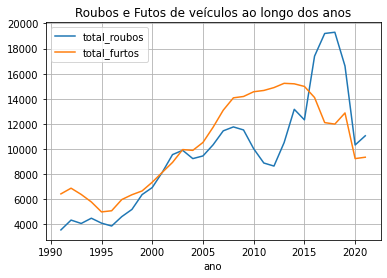

In [ ]:
df2.groupby(["ano"]).mean().total_roubos.plot(legend=True , grid=True);
df2.groupby(["ano"]).mean().total_furtos.plot(legend=True , grid = True);
plt.title("Roubos e Futos de veículos ao longo dos anos");

Pelo gráfico é fácil ver que tanto roubos quanto furtos cresceram de forma expressiva entre 1995 e 2015. Entre 2015 e 2017 houve uma explosão de casos de roubos, seguido de queda expressiva até 2020. 

# Crimes contra a vida

Agora vamos ver crimes relacioandos contra a vida.

Vamos ver o mínimo e o máximo de casos de Homicídio Doloso

In [ ]:
print("Máx : {}".format(df2.hom_doloso.max()))
print("Min: {}".format(df2.hom_doloso.min()))

Máx : 831
Min: 239


Aqui vemos que o máximo foi 831 casos e o mínimo foi 239 casos. Vamos olhar em que ano eles ocorreram

In [ ]:
df2[df2.hom_doloso == 831]

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
48,1995,1,831,NaN,17,NaN,NaN,848,166,3626,NaN,NaN,NaN,1056,NaN,377,1433,2060,188,323,174,38,NaN,NaN,NaN,NaN,134,4350,1924,520,NaN,NaN,NaN,2941,5385,NaN,NaN,NaN,NaN,147,NaN,NaN,NaN,1435,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,NaN,3


In [ ]:
df2[df2.hom_doloso == 239]

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
356,2020,9,239,3.0,7,249.0,54.0,303,343,4560,481.0,171.0,1675.0,3567,1319.0,582,5468,1742,323,294,61,0,4.0,2.0,57.0,27.0,1146,9124,1065,698,379.0,823.0,132.0,5888,8985,1.0,105.0,5.0,4086.0,1984,974.0,890.0,150.0,1173,2497.0,455.0,1059.0,37.0,4094.0,297.0,22,1.0,0.0,0.0,48732.0,3


O maior caso de homicídio doloso ocorreu em 1995 e o menor caso em 2020. Mas será que isso é uma tendência? vamos ver um gráfico mostrando a médias de homicídio doloso em cada ano

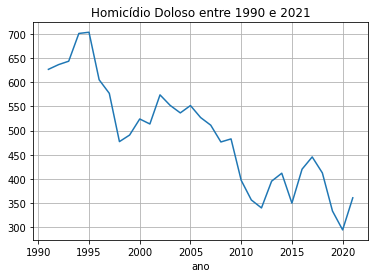

In [ ]:
df2.groupby(["ano"]).mean().hom_doloso.plot(grid=True);
plt.title("Homicídio Doloso entre 1990 e 2021");

Isso é um bom sinal, aparentemente é um tendência a diminuição de Homicídio Doloso no Rio de Janeiro ao longo dos anos.

# Crimes e o impacto da pandemia da Covid-19

Com o aparecimento do covid-19. Cidades do mundo inteiro entraram em isolamento social para diminuir o índice de infecção. Muitos comércios fecharam e a maioria das pessoas tiveram que ficar em casa fazendo home office. 

Enquanto para muitos, o ambiente familiar é um lugar de segurança e tranquilidade, para muitas mulheres isso não é verdade em se tratando de violência doméstica. Em 2019, **aproximadamente 60% das vítimas de violência contra mulher sofreram dentro de casa**. Dessa forma, o isolamento representou um risco para mulheres que tiveram que ficar mais tempo em casa e na presença do agressor.

Vamos pegar a média de Lesão Corporal Dolosa para 2019 e 2020.

In [ ]:
print("Média de Lesão Corporal Doloso: {} para 2019 e {} para 2020".format(round(df2.groupby(["ano"]).lesao_corp_dolosa.mean()[2019]),round(df2.groupby(["ano"]).lesao_corp_dolosa.mean()[2020])))

Média de Lesão Corporal Doloso: 5305 para 2019 e 4146 para 2020


Houve uma queda de de aproximadamente **22%** em 2020 com relação à 2019. Mas por quê? 

Devemos ter cuidado ao analisar pois a maior impacto da Pandemia para esses dados foi a diminuição do registro de ocorrência nas delegacias. Isso pode ocorrer tanto pelo receio de pegar o vírus ao ir fazer a denúncia na delegacia quanto pelo controle do agressor pela vítima. Tudo isso gera a **subnotificação** de dados.

Primeiro vamos isolar os dados do Dataframe para ter apenas os meses de 2020.

In [ ]:
ano_2020 = df2[df2.ano == 2020]
ano_2020

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
348,2020,1,358,4.0,8,370.0,156.0,526,448,5369,398.0,145.0,1936.0,6194,2188.0,1181,9563,3246,577,414,74,1,5.0,6.0,99.0,29.0,1852,15866,1365,2118,582.0,1744.0,278.0,8562,14649,0.0,98.0,9.0,3950.0,1720,734.0,877.0,140.0,2128,2857.0,482.0,1335.0,265.0,4942.0,400.0,36,1.0,2.0,0.0,65718.0,3
349,2020,2,326,2.0,10,338.0,164.0,502,421,5408,420.0,153.0,1890.0,5692,2065.0,1298,9055,2925,418,382,61,2,7.0,4.0,81.0,12.0,1555,14502,1182,2133,568.0,2270.0,231.0,7328,13712,0.0,103.0,10.0,3547.0,1738,776.0,877.0,111.0,1788,2883.0,431.0,1190.0,243.0,4643.0,378.0,39,2.0,1.0,0.0,62850.0,3
350,2020,3,374,2.0,9,385.0,115.0,500,361,4069,367.0,130.0,1248.0,4400,1541.0,984,6925,2449,365,308,71,0,7.0,5.0,93.0,18.0,1720,11961,1114,1210,394.0,1139.0,180.0,6752,10789,0.0,99.0,16.0,3086.0,1469,558.0,814.0,128.0,1526,2543.0,385.0,914.0,180.0,3243.0,272.0,16,0.0,2.0,0.0,49816.0,3
351,2020,4,312,5.0,5,322.0,179.0,501,324,2722,241.0,133.0,584.0,2533,984.0,489,4006,1846,337,169,56,2,4.0,1.0,53.0,13.0,1406,7893,922,283,105.0,305.0,106.0,4001,5722,0.0,95.0,9.0,2594.0,1436,428.0,918.0,123.0,1114,2452.0,410.0,544.0,2.0,2216.0,178.0,26,3.0,1.0,0.0,32814.0,3
352,2020,5,273,0.0,6,279.0,130.0,409,291,2429,261.0,130.0,684.0,2451,942.0,420,3813,1586,455,169,46,2,8.0,2.0,44.0,5.0,1185,7315,904,255,108.0,356.0,84.0,4266,5973,0.0,85.0,7.0,3572.0,1581,535.0,935.0,140.0,991,2169.0,314.0,687.0,6.0,2301.0,181.0,16,4.0,0.0,1.0,35003.0,3
353,2020,6,259,2.0,2,263.0,34.0,297,307,3156,394.0,143.0,882.0,2849,951.0,580,4380,1743,404,199,38,0,5.0,8.0,49.0,15.0,1079,7920,954,331,172.0,371.0,80.0,4797,6705,0.0,93.0,12.0,5210.0,1502,592.0,818.0,131.0,1060,2145.0,308.0,763.0,8.0,2827.0,210.0,20,1.0,3.0,0.0,41912.0,3
354,2020,7,257,4.0,7,268.0,52.0,320,377,3934,382.0,165.0,1526.0,3848,1345.0,846,6039,1817,544,228,77,0,6.0,16.0,72.0,13.0,1362,10174,1061,582,257.0,630.0,103.0,5852,8485,0.0,133.0,13.0,6058.0,1844,822.0,895.0,160.0,1207,2612.0,345.0,1331.0,12.0,3660.0,238.0,18,3.0,1.0,0.0,51242.0,3
355,2020,8,261,2.0,12,275.0,51.0,326,354,4213,459.0,162.0,1702.0,3481,1252.0,659,5392,1791,415,243,42,2,5.0,4.0,74.0,15.0,1190,9173,1107,702,343.0,746.0,129.0,5755,8782,0.0,118.0,3.0,4592.0,2050,1009.0,917.0,172.0,1283,2915.0,343.0,1512.0,35.0,4102.0,275.0,29,4.0,0.0,2.0,50348.0,3
356,2020,9,239,3.0,7,249.0,54.0,303,343,4560,481.0,171.0,1675.0,3567,1319.0,582,5468,1742,323,294,61,0,4.0,2.0,57.0,27.0,1146,9124,1065,698,379.0,823.0,132.0,5888,8985,1.0,105.0,5.0,4086.0,1984,974.0,890.0,150.0,1173,2497.0,455.0,1059.0,37.0,4094.0,297.0,22,1.0,0.0,0.0,48732.0,3
357,2020,10,274,2.0,5,281.0,145.0,426,405,4602,452.0,168.0,1841.0,3971,1283.0,768,6022,1899,358,289,49,0,0.0,6.0,51.0,15.0,1239,9928,1058,813,431.0,1005.0,157.0,5864,9328,0.0,105.0,11.0,4593.0,2019,972.0,910.0,173.0,1212,2787.0,369.0,993.0,37.0,4194.0,297.0,24,4.0,2.0,0.0,50772.0,2


Vamos ver agora a quantidade  de casos de lesão corporal para cada mês de 2020 usando o gráfico abaixo.

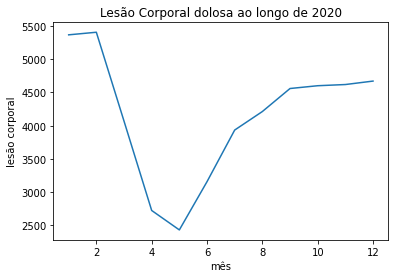

In [35]:
plt.plot(ano_2020.mes , ano_2020.lesao_corp_dolosa);
plt.xlabel("mês");
plt.ylabel("lesão corporal");
plt.title("Lesão Corporal dolosa ao longo de 2020");

Esse gráfico é interessante pois mostra uma queda abrupta depois de Fevereiro. Isso se deve ao fato que foi nessa época que começou a isolamento mais forte no Rio de Janeiro.

Já na metade do ano houve uma flexibiliade do isolamento, com o comércio voltado a funcionar aos poucos. Por isso a aumento de casos, chegando quase na mesma quantidade que tinha antes do isolamento.

Esse comportamento se aplica não somente à Lesão Corporal Dosola, mas diversos outros crimes devido à diminuição de pessoas nas ruas. Veja abaixo o gráfico para quatro tipos de crimes diferentes:

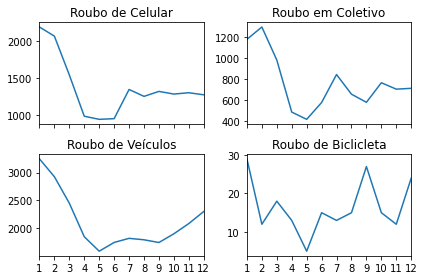

In [34]:
fig , axes = plt.subplots(2,2 , sharex=True)
xticks = np.arange(1,13,1)

axes[0,0].plot(ano_2020.mes , ano_2020.roubo_celular)
axes[0,0].set_title("Roubo de Celular")
axes[0,0].set_xlim([1,12])
axes[0,0].set_xticks(xticks)

axes[0,1].plot(ano_2020.mes , ano_2020.roubo_em_coletivo)
axes[0,1].set_title("Roubo em Coletivo")
axes[0,1].set_xlim([1,12])
axes[0,1].set_xticks(xticks)

axes[1,0].plot(ano_2020.mes , ano_2020.roubo_veiculo)
axes[1,0].set_title("Roubo de Veículos")
axes[1,0].set_xlim([1,12])
axes[1,0].set_xticks(xticks)

axes[1,1].plot(ano_2020.mes , ano_2020.roubo_bicicleta)
axes[1,1].set_title("Roubo de Biclicleta")
axes[1,1].set_xlim([1,12])
axes[1,1].set_xticks(xticks)

plt.tight_layout()
plt.show()

Como pode ver, todos eles seguem mais ou menos o mesmo padrão.

# Conclusão

Fizemos uma análise simples em cima do dataset. Vimos que quando se trata de um dataset real, existem muitos problemas como falta de valores e tipos de variáveis erradas. Em média, passa se mais tempo limpando e arrumando o dataset do que fazendo a análise em si. Sem uma limpeza boa, os resultados e insights que voce extrair do dataset podem estar errados.

Também vimos a influência que o Covid-19 teve na nossa análise de dados ao causar subnotificação no registro de dados, podendo gerar conclusões erradas. 

